In [1]:
# Python packages needed.
import numpy as np
import pandas as pd
import time
import datetime
import keras
from keras import layers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras . layers import Dense , Dropout
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Input the data
data = pd.read_csv('Shamoun-Baranes et al. (2016).csv');
b=data.shape;   #shape
# print(b)

In [3]:
data.head()

,BirdID,BirdYear,Destination,DateTime,Longitude,Latitude,CumulativeDistance,ColonyDistance
0,311,311 (2010),IberianPeninsula,2010-06-01 00:44,4.718153,53.008210,0.002582,19.308040
1,311,311 (2010),IberianPeninsula,2010-06-01 01:04,4.718106,53.008249,0.009400,19.305068
2,311,311 (2010),IberianPeninsula,2010-06-01 01:24,4.718101,53.008271,0.011885,19.304892
3,311,311 (2010),IberianPeninsula,2010-06-01 01:45,4.718152,53.008265,0.017619,19.308285
4,311,311 (2010),IberianPeninsula,2010-06-01 02:06,4.718137,53.008245,0.020441,19.307134


In [7]:
# filter out one animols
animals_317 = data[data['BirdID']==317]

# input value
animals_317_time=pd.to_datetime(animals_317['DateTime'])

In [8]:
animals_317.head()

,BirdID,BirdYear,Destination,DateTime,Longitude,Latitude,CumulativeDistance,ColonyDistance
19918,317,317 (2010),IberianPeninsula,2010-06-01 00:48,4.132943,52.899424,0.991786,22.835252
19919,317,317 (2010),IberianPeninsula,2010-06-01 01:11,4.127699,52.893184,1.897008,23.486885
19920,317,317 (2010),IberianPeninsula,2010-06-01 01:35,4.122706,52.886938,2.784944,24.132009
19921,317,317 (2010),IberianPeninsula,2010-06-01 01:58,4.115767,52.880747,3.818170,24.891514
19922,317,317 (2010),IberianPeninsula,2010-06-01 02:21,4.101258,52.874910,5.556956,26.061659


In [10]:
animals_317.DateTime = pd.to_datetime(animals_317.DateTime)
animals_317['DateTime'].head()

F:\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


19918   2010-06-01 00:48:00
19919   2010-06-01 01:11:00
19920   2010-06-01 01:35:00
19921   2010-06-01 01:58:00
19922   2010-06-01 02:21:00
Name: DateTime, dtype: datetime64[ns]

In [11]:
animals_317 = animals_317.set_index('DateTime')
animals_317.head()

,BirdID,BirdYear,Destination,Longitude,Latitude,CumulativeDistance,ColonyDistance
DateTime,,,,,,,
2010-06-01 00:48:00,317,317 (2010),IberianPeninsula,4.132943,52.899424,0.991786,22.835252
2010-06-01 01:11:00,317,317 (2010),IberianPeninsula,4.127699,52.893184,1.897008,23.486885
2010-06-01 01:35:00,317,317 (2010),IberianPeninsula,4.122706,52.886938,2.784944,24.132009
2010-06-01 01:58:00,317,317 (2010),IberianPeninsula,4.115767,52.880747,3.818170,24.891514
2010-06-01 02:21:00,317,317 (2010),IberianPeninsula,4.101258,52.874910,5.556956,26.061659


In [13]:
animals_317.sort_index(ascending = True).head()

,BirdID,BirdYear,Destination,Longitude,Latitude,CumulativeDistance,ColonyDistance
DateTime,,,,,,,
2010-06-01 00:48:00,317,317 (2010),IberianPeninsula,4.132943,52.899424,0.991786,22.835252
2010-06-01 01:11:00,317,317 (2010),IberianPeninsula,4.127699,52.893184,1.897008,23.486885
2010-06-01 01:35:00,317,317 (2010),IberianPeninsula,4.122706,52.886938,2.784944,24.132009
2010-06-01 01:58:00,317,317 (2010),IberianPeninsula,4.115767,52.880747,3.818170,24.891514
2010-06-01 02:21:00,317,317 (2010),IberianPeninsula,4.101258,52.874910,5.556956,26.061659


In [14]:
animals_317_location = animals_317[animals_317.columns[3:5]]
animals_317_location

,Longitude,Latitude
DateTime,,
2010-06-01 00:48:00,4.132943,52.899424
2010-06-01 01:11:00,4.127699,52.893184
2010-06-01 01:35:00,4.122706,52.886938
2010-06-01 01:58:00,4.115767,52.880747
2010-06-01 02:21:00,4.101258,52.874910
...,...,...
2015-05-31 22:10:00,4.951344,52.752281
2015-05-31 22:31:00,4.951407,52.752236
2015-05-31 22:53:00,4.951511,52.752190


In [22]:
resample = animals_317_location.resample('D').mean()
resample=resample.resample('D').interpolate('linear')
resample

,Longitude,Latitude
DateTime,,
2010-06-01,4.583350,52.966381
2010-06-02,4.717499,53.010517
2010-06-03,4.697161,53.010346
2010-06-04,4.532929,52.930248
2010-06-05,4.697379,53.008980
...,...,...
2015-05-27,4.830571,52.864545
2015-05-28,4.777756,52.935721
2015-05-29,4.873837,52.813498


In [23]:
time = pd.date_range('2010-06-01',periods = 1826, freq = 'D')
t=time.to_numpy()
tt = t.tolist()

In [24]:
train_data_Long = resample['Longitude']
train_data_Lat = resample['Latitude']
Long = train_data_Long.to_numpy()
Lat = train_data_Lat.to_numpy()
LLong=Long.tolist()
LLat=Lat.tolist()

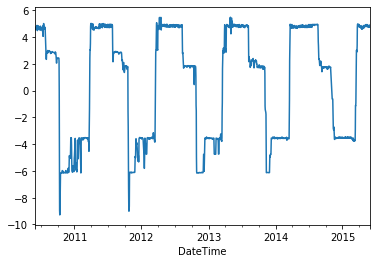

In [25]:
train_data_Long.()

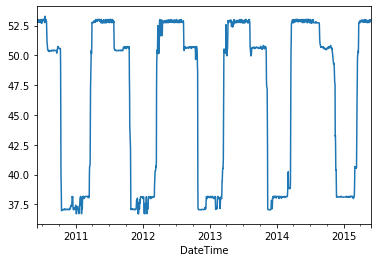

In [26]:
train_data_Lat.plot()

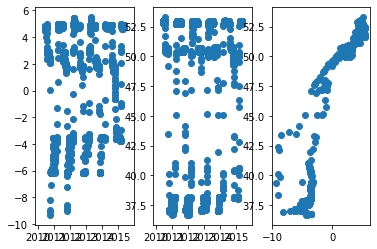

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False)
ax1.scatter(time,train_data_Long)
ax2.scatter(time,train_data_Lat)
ax3.scatter(train_data_Long,train_data_Lat)